<a id='top'> </a> <br>
# Contents
1.  [Introduction](#1)
2.  [Import the required libraries](#2)
3.  [Read the Dataset](#3)
4.  [Data Exploration](#4)
5.  [Data Preprocessing](#5)
6.  [Data Cleaning](#6)
7.  [Data Visualisation](#7)
8.  [Data Analysis](#8)
9.  [Machine Learning](#9)
10. [KNN](#10)
11. [Logistic Regression](#11)
12. [Decision Tree](#12)
13. [Random Forest](#13)
14. [Naive Bayes](#14)
15. [SVM](#15)
16. [Expected Outcome](#16)

<a id = 1></p><br>
# Introduction

<a id = 2></p><br>
# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

<a id = 3></p><br>
# Read the Dataset

In [2]:
df1 = pd.read_csv("diabetes_data.csv")

<a id = 4></p><br>
# Data Exploration

In [3]:
df1.shape #check the total number of rows and columns

(768, 11)

In [4]:
df1.head() #check the first 5 entries in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Doctor,Hospital
0,6,148,72,35,0,33.6,0.627,50,1,####,ABC
1,1,85,66,29,0,26.6,0.351,31,0,####,CYZ
2,8,183,64,0,0,23.3,0.672,32,1,####,NEW
3,1,89,66,23,94,28.1,0.167,21,0,####,NaN
4,0,137,40,35,168,43.1,2.288,33,1,####,FORTIS


In [5]:
df1.tail() #check the last 5 entries in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Doctor,Hospital
763,10,101,76,48,180,32.9,0.171,63,0,####,NaN
764,2,122,70,27,0,36.8,0.340,27,0,####,NaN
765,5,121,72,23,112,26.2,0.245,30,0,####,NaN
766,1,126,60,0,0,30.1,0.349,47,1,####,NaN
767,1,93,70,31,0,30.4,0.315,23,0,####,NaN


In [6]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<a id = 5></p><br>
# Data Preprocessing

In [7]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Doctor',
       'Hospital'],
      dtype='object')

In our dataset the columns that have '0' are null values, hence for cleaning purpose we are replacing the '0' values in columns with 'NaN'.

## Replacing "null" values with "NaN"

In [8]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df1.isnull().sum() #checking null values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Doctor                        0
Hospital                    138
dtype: int64

The column "Hospital" has "138" null values, column "Glucose" has "5" null values, column "BloodPressure" has "35" null values, column "SkinThickness" has "227" null values, column "Insulin" has "374" null values and column "BMI" has "11" null values and other columns do not have any null values in them.

<a id = 6></p><br>
# Data Cleaning

<AxesSubplot:>

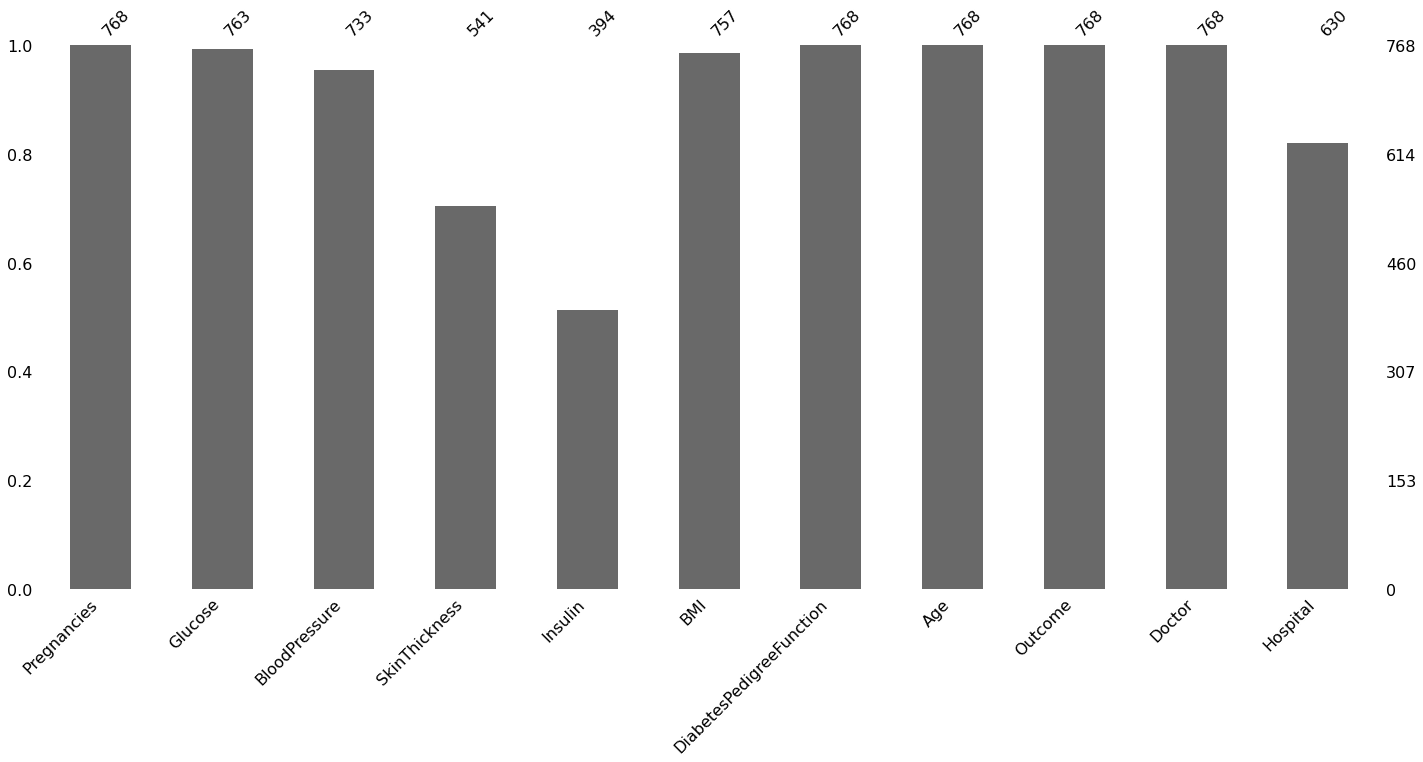

In [10]:
msno.bar(df1) #graph to dislay number of null values

Droping the unrequired columns from the dataset

In [11]:
df1.drop(['Doctor'], axis = 1, inplace = True) #Removing the column doctor as it is not required for our prediction model

In [12]:
df1.drop(['Hospital'],axis = 1, inplace = True) #Removing 'Hospital' as it is not required for training the model

In [13]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Handling other null values

<AxesSubplot:>

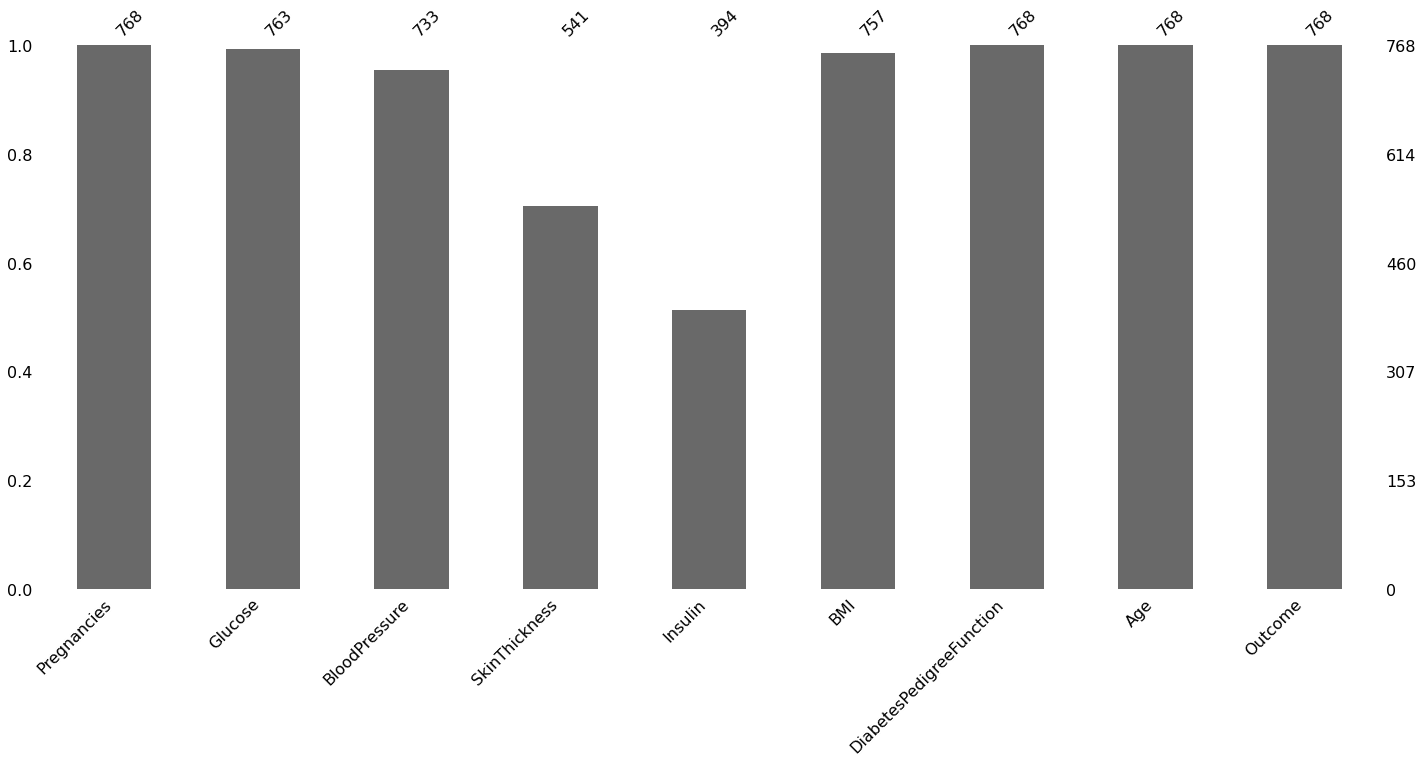

In [14]:
msno.bar(df1) #graph to dislay number of null values after dropping 'Doctor' and 'Hospital' column

## Handling other missing values 

We propose to clean the data by replacing the null values with meadian values.
We create a funtion to find the meadian values in the given column.
We find meadin values according to the "Outcome" values i.e. we handle the null values by finding median for "Outcome" having value "0" and "1" sepratly and replacing them respectively.

In [15]:
def outcome_median(column_name): #function to find median  
    median = df1[df1[column_name].notnull()]
    median = median[[column_name, 'Outcome']].groupby(['Outcome'])[[column_name]].median().reset_index()
    return median

In [16]:
outcome_median('Insulin') #Finding median for column 'Insulin'

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [17]:
#Replacing null values with their respective median values
df1.loc[(df1['Outcome'] == 0 )&(df1['Insulin'].isnull()),'Insulin'] = 102.5
df1.loc[(df1['Outcome'] == 1 )&(df1['Insulin'].isnull()),'Insulin'] = 169.5

In [18]:
outcome_median('Glucose') #Finding median for column 'Glucose'

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [19]:
#Replacing null values with their respective median values
df1.loc[(df1['Outcome'] == 0)&(df1['Glucose'].isnull()),'Glucose'] = 107
df1.loc[(df1['Outcome'] == 1)&(df1['Glucose'].isnull()),'Glucose'] = 140

In [20]:
outcome_median('SkinThickness') #Finding median for column 'SkinThickness'

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [21]:
#Replacing null values with their respective median values
df1.loc[(df1['Outcome'] == 0)&(df1['SkinThickness'].isnull()),'SkinThickness'] = 27
df1.loc[(df1['Outcome'] == 1)&(df1['SkinThickness'].isnull()),'SkinThickness'] = 32

In [22]:
outcome_median('BloodPressure') #Finding median for column 'BloodPressure'

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [23]:
#Replacing null values with their respective median values
df1.loc[(df1['Outcome'] == 0)&(df1['BloodPressure'].isnull()),'BloodPressure'] = 70
df1.loc[(df1['Outcome'] == 1)&(df1['BloodPressure'].isnull()),'BloodPressure'] = 74.5

In [24]:
outcome_median('BMI') #Finding median for column 'BMI'

,Outcome,BMI
0,0,30.1
1,1,34.3


In [25]:
#Replacing null values with their respective median values
df1.loc[(df1['Outcome'] == 0 )&(df1['BMI'].isnull()),'BMI'] = 30.1
df1.loc[(df1['Outcome'] == 1 )&(df1['BMI'].isnull()),'BMI'] = 34.3

## Checking if there is anyother "null" values are in the dataset.

<AxesSubplot:>

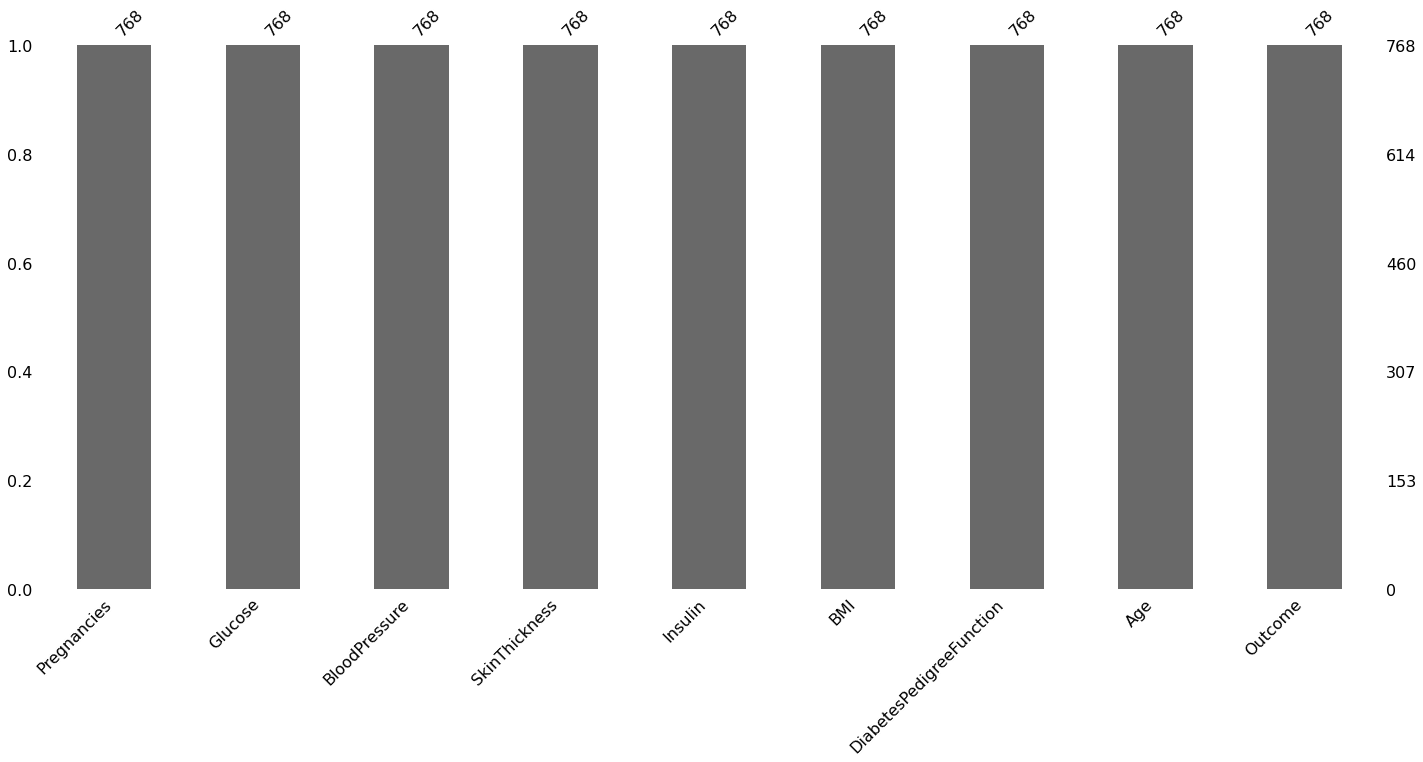

In [26]:
msno.bar(df1) #graph to dislay number of null values data cleaning

In [27]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


From the above graph we can say that now there are no null values in our dataset. Hence, our dataset is clean.

<a id = 7></p><br>
# Data Visualisation

Text(0.5, 1.0, 'Heatmap for the Dataset')

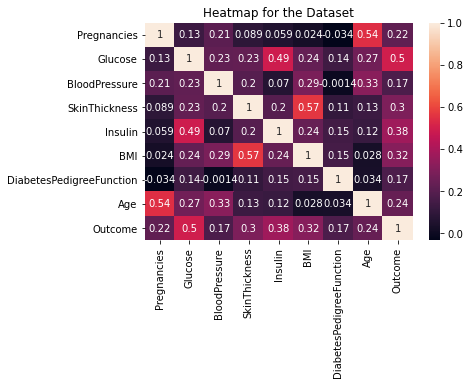

In [28]:
sns.heatmap(df1.corr(), annot = True)
plt.title('Heatmap for the Dataset')

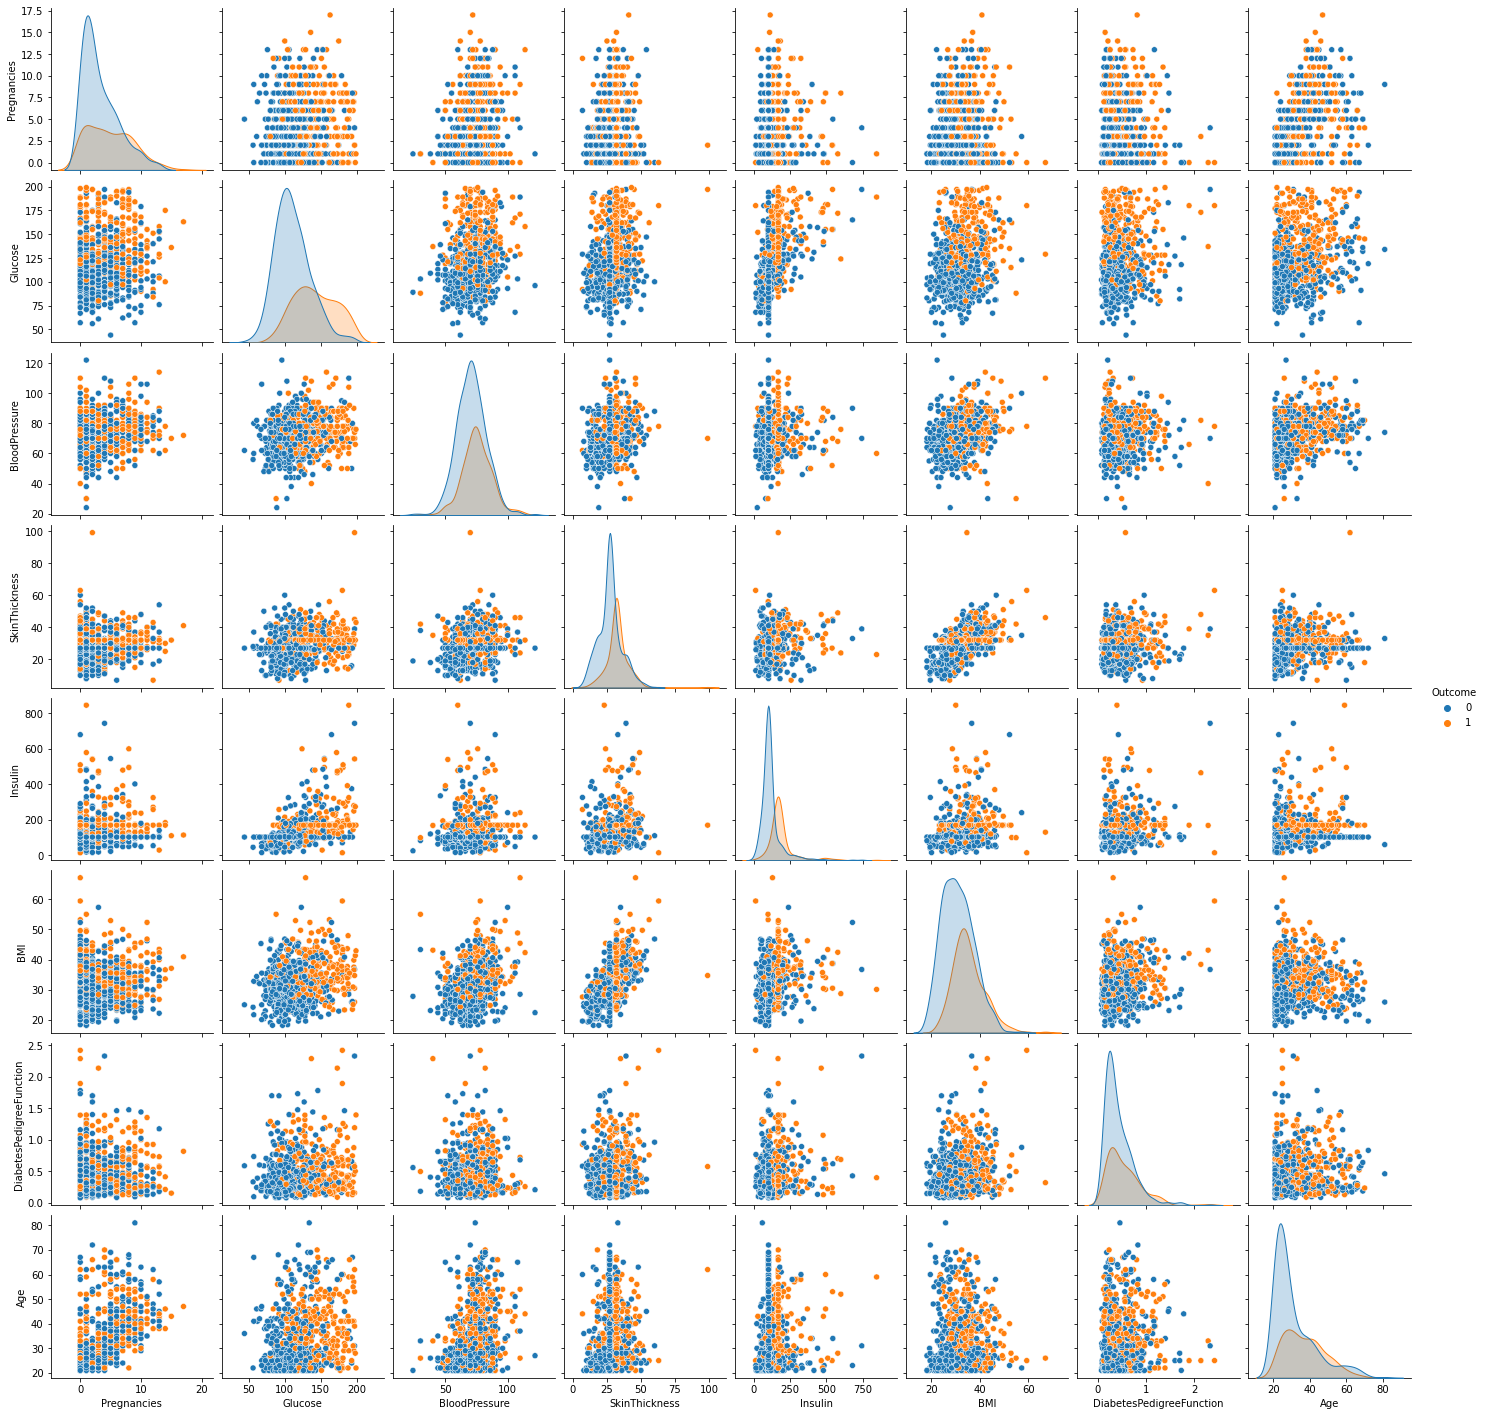

In [29]:
sns.pairplot(data = df1, hue = 'Outcome')

<a id = 8></p><br>
# Data Analysis

In order to analyze the relationship between different attributes present in the dataset, we plotted a heatmap and pairplot as shown in Data Visualisation. From that we can see that glucose and insulin are highly correlated with diabetes. We can also see that BMI and skin thickness have a high correlation with each other. There is a correlation between age and pregnancies. Insulin and glucose are also strongly correlated with each other.

<a id = 9></p><br>
# Machine Learning

### Import the required Libraries

In [30]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

<a id = 10></p><br>
## KNN

### Import all required Libraries

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

### Preparing the data for KNN Model

Spliting the data into training and testing data.

In [32]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [33]:
n = KNeighborsClassifier()
n.fit(X_train,y_train)

y_expect = y_test
y_pred1 = n.predict(X_test)

print(metrics.classification_report(y_expect,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.84      0.80      0.82        51

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



In [34]:
accuracy_KNN = accuracy_score(y_test, y_pred1)
print(accuracy_KNN*100)

88.31168831168831


In [35]:
n = KNeighborsClassifier(n_neighbors = 3)
n.fit(X_train,y_train)

y_expect = y_test
y_pred2 = n.predict(X_test)

print(metrics.classification_report(y_expect,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       103
           1       0.79      0.75      0.77        51

    accuracy                           0.85       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



In [36]:
accuracy_KNN1 = accuracy_score(y_test, y_pred2)
print(accuracy_KNN1*100)

85.06493506493507


In [37]:
n = KNeighborsClassifier(n_neighbors = 6)
n.fit(X_train,y_train)

y_expect = y_test
y_pred3 = n.predict(X_test)

print(metrics.classification_report(y_expect,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       103
           1       0.85      0.76      0.80        51

    accuracy                           0.88       154
   macro avg       0.87      0.85      0.86       154
weighted avg       0.88      0.88      0.87       154



In [38]:
accuracy_KNN3 = accuracy_score(y_test, y_pred3)
print(accuracy_KNN3*100)

87.66233766233766


### Conclusion

After implementing the KNN algorithm it was found that the accuracy of model is best at n = 5 (Default) i.e. 88.31 %.

<a id = 11></p><br>
## Logistic Regression

### Import the required Libraries

In [39]:
from sklearn.linear_model import LogisticRegression

### Preparing data for Logistic Regression Model

In [40]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [41]:
LRModel = LogisticRegression()
LRModel.fit(X_train,y_train)

y_expect = y_test
y_pred4 = LRModel.predict(X_test)

print(metrics.classification_report(y_expect,y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.70      0.63      0.66        51

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [42]:
accuracy_LR = accuracy_score(y_test, y_pred4)
print(accuracy_LR*100)

78.57142857142857


### Conclusion

After implementing the Logistic Regression algorithm it was found that the accuracy of model 78.57 %.

<a id = 12></p><br>
## Decision Tree

### Import the required Libraries

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Preparing data for Decision Tree Model

In [44]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [45]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train,y_train)

y_expect = y_test
y_pred5 = clf.predict(X_test)

print(metrics.classification_report(y_expect,y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       103
           1       0.80      0.76      0.78        51

    accuracy                           0.86       154
   macro avg       0.84      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [46]:
accuracy_DT = accuracy_score(y_test, y_pred5)
print(accuracy_DT*100)

85.71428571428571


### Conclusion 

After implementing the Decision Tree algorithm it was found that the accuracy of model is 85.71 %.

<a id = 13></p><br>
## Random Forest

### Import the required Libraries

In [47]:
from sklearn.ensemble import RandomForestClassifier

### Preparing data for Random Forest Model

In [48]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [49]:
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

y_expect = y_test
y_pred6 = ranfor.predict(X_test)

print(metrics.classification_report(y_expect,y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       103
           1       0.76      0.75      0.75        51

    accuracy                           0.84       154
   macro avg       0.82      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154



In [50]:
accuracy_ranfor = accuracy_score(y_test, y_pred6)
print(accuracy_ranfor*100)

83.76623376623377


### Conclusion 

After implementing the Random Forest algorithm it was found that the accuracy of model is 83.76 %.

<a id = 14></p><br>
## Naive Bayes

### Import the required Libraries

In [51]:
from sklearn.naive_bayes import GaussianNB

### Preparing data for Naive Bayes Model

In [52]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [53]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_expect = y_test
y_pred7 = nb.predict(X_test)

print(metrics.classification_report(y_expect,y_pred7))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.67      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [54]:
accuracy_nb = accuracy_score(y_test, y_pred7)
print(accuracy_nb*100)

77.27272727272727


### Conclusion 

After implementing the Naive Bayes algorithm it was found that the accuracy of model is 77.27 %.

<a id = 15></p><br>
## SVM

### Import the required Libraries

In [55]:
from sklearn import svm

### Preparing data for SVM Model

In [56]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis = 1),df1['Outcome'],test_size = 0.20,random_state = 101)

In [57]:
SM = svm.SVC()
SM.fit(X_train, y_train)

y_expect = y_test
y_pred8 = SM.predict(X_test)

print(metrics.classification_report(y_expect,y_pred8))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       103
           1       0.77      0.86      0.81        51

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.87      0.87       154



In [58]:
accuracy_SVM = accuracy_score(y_test, y_pred8)
print(accuracy_SVM*100)

87.01298701298701


### Conclusion 

After implementing the Support Vector Machine (SVM) algorithm it was found that the accuracy of model is 87.01 %.

<a id = 16></p><br>
# Expected Outcome

In [59]:
x = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data = [1,148,126,60,90,30.1,0.349,47]
paitentid_54 = pd.DataFrame([data],columns = x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,148,126,60,90,30.1,0.349,47


In [60]:
predictions_diabetes = n.predict(paitentid_54)
print(predictions_diabetes)

[0]


In [62]:
x2 = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data2 = [5,144,122,85,136,34,0.9,88]
paitentid_SVM = pd.DataFrame([data2],columns = x2)
paitentid_SVM.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,144,122,85,136,34,0.9,88


In [63]:
predictions_diabetes2 = SM.predict(paitentid_SVM)
print(predictions_diabetes2)

[1]


In [64]:
x3 = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data3 = [6,288,72,35,150,33.6,0.627,50]
paitentid_DT = pd.DataFrame([data3],columns = x3)
paitentid_DT.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,288,72,35,150,33.6,0.627,50


In [65]:
predictions_diabetes3 = clf.predict(paitentid_DT)
print(predictions_diabetes3)

[1]
